# Natural Language Processing of the KJV Bible
+ Sentiment Analysis
+ EDA
+ Summarization
+ Prediction of Verse

#### Data Sources
+ https://raw.githubusercontent.com/scrollmapper/bible_databases/master/csv/t_kjv.csv

## Preprocessing of the KJV Bible

In [1]:
# Load EDA Pkgs
from typing import Tuple
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
# Load Dataset
df = pd.read_csv("t_kjv.csv", index_col=False)

In [3]:
# Columns
df.columns

Index(['id', 'b', 'c', 'v', 't'], dtype='object')

In [4]:
# Head
df.head()

,id,b,c,v,t
0,1001001,1,1,1,In the beginning God created the heaven and th...
1,1001002,1,1,2,"And the earth was without form, and void; and ..."
2,1001003,1,1,3,"And God said, Let there be light: and there wa..."
3,1001004,1,1,4,"And God saw the light, that it was good: and G..."
4,1001005,1,1,5,"And God called the light Day, and the darkness..."


In [5]:
# Rename Books
df1 = df

In [6]:
# Replacing with the correct name
df1.b.replace(
    {
        1: "Genesis",
        2: "Exodus",
        3: "Leviticus",
        4: "Numbers",
        5: "Deuteronomy",
        6: "Joshua",
        7: "Judges",
        8: "Ruth",
        9: "1 Samuel (1 Kings)",
        10: "2 Samuel (2 Kings)",
        11: "1 Kings (3 Kings)",
        12: "2 Kings (4 Kings)",
        13: "1 Chronicles",
        14: "2 Chronicles",
        15: "Ezra",
        16: "Nehemiah",
        17: "Esther",
        18: "Job",
        19: "Psalms",
        20: "Proverbs",
        21: "Ecclesiastes",
        22: "Song of Solomon (Canticles)",
        23: "Isaiah",
        24: "Jeremiah",
        25: "Lamentations",
        26: "Ezekiel",
        27: "Daniel",
        28: "Hosea",
        29: "Joel",
        30: "Amos",
        31: "Obadiah",
        32: "Jonah",
        33: "Micah",
        34: "Nahum",
        35: "Habakkuk",
        36: "Zephaniah",
        37: "Haggai",
        38: "Zechariah",
        39: "Malachi",
        40: "Matthew",
        41: "Mark",
        42: "Luke",
        43: "John",
        44: "Acts",
        45: "Romans",
        46: "1 Corinthians",
        47: "2 Corinthians",
        48: "Galatians",
        49: "Ephesians",
        50: "Philippians",
        51: "Colossians",
        52: "1 Thessalonians",
        53: "2 Thessalonians",
        54: "1 Timothy",
        55: "2 Timothy",
        56: "Titus",
        57: "Philemon",
        58: "Hebrews",
        59: "James",
        60: "1 Peter",
        61: "2 Peter",
        62: "1 John",
        63: "2 John",
        64: "3 John",
        65: "Jude",
        66: "Revelation",
    },
    inplace=True,
)

In [7]:
# Renaming Columns
df1.columns = ["id", "book", "chapter", "verse", "text"]

In [8]:
Genesis = df1[df1["book"] == "Genesis"]
Chapter1 = Genesis[Genesis["chapter"] == 1]
Chapter1

,id,book,chapter,verse,text
0,1001001,Genesis,1,1,In the beginning God created the heaven and th...
1,1001002,Genesis,1,2,"And the earth was without form, and void; and ..."
2,1001003,Genesis,1,3,"And God said, Let there be light: and there wa..."
3,1001004,Genesis,1,4,"And God saw the light, that it was good: and G..."
4,1001005,Genesis,1,5,"And God called the light Day, and the darkness..."
5,1001006,Genesis,1,6,"And God said, Let there be a firmament in the ..."
6,1001007,Genesis,1,7,"And God made the firmament, and divided the wa..."
7,1001008,Genesis,1,8,And God called the firmament Heaven. And the e...
8,1001009,Genesis,1,9,"And God said, Let the waters under the heaven ..."
9,1001010,Genesis,1,10,And God called the dry land Earth; and the gat...


In [9]:
Chapter1[Chapter1["verse"] == 1]["book"].values[0]
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    print(Genesis)

           id     book  chapter  verse  \
0     1001001  Genesis        1      1   
1     1001002  Genesis        1      2   
2     1001003  Genesis        1      3   
3     1001004  Genesis        1      4   
4     1001005  Genesis        1      5   
5     1001006  Genesis        1      6   
6     1001007  Genesis        1      7   
7     1001008  Genesis        1      8   
8     1001009  Genesis        1      9   
9     1001010  Genesis        1     10   
10    1001011  Genesis        1     11   
11    1001012  Genesis        1     12   
12    1001013  Genesis        1     13   
13    1001014  Genesis        1     14   
14    1001015  Genesis        1     15   
15    1001016  Genesis        1     16   
16    1001017  Genesis        1     17   
17    1001018  Genesis        1     18   
18    1001019  Genesis        1     19   
19    1001020  Genesis        1     20   
20    1001021  Genesis        1     21   
21    1001022  Genesis        1     22   
22    1001023  Genesis        1   

## Introduction of `tf`, `idf`, and `tf-idf` functions

In [10]:
import re
import math


def get_tf_for_documents(documents, sortby="tf", skip_stopwords: bool = False):
    """Get the term frequency for each word in a list of documents.

    Parameters
    ----------
    verses : list
        A list of verses.
    sortby : str, optional
        The column to sort by, by default 'tf'. Can be chosen from ['word', 'tc', 'tf'].
    skip_stopwords : bool, optional
        Whether to skip stopwords, by default False.

    Returns
    -------
    pd.DataFrame
        A DataFrame with the term frequency for each word in the documents.
    """
    tf = pd.DataFrame(columns=["word", "tc", "tf"])

    if skip_stopwords:
        from nltk.corpus import stopwords

        stopwords_set = set(stopwords.words("english"))
    else:
        stopwords_set = set()

    # Get n_words
    n_words = 0
    for verse in documents:
        verse_words = re.findall(r"\w+", verse)
        n_words += len(verse_words)

    for verse in documents:
        verse_words = re.findall(r"\w+", verse)
        for word in verse_words:
            word = word.lower()
            if word not in tf["word"].values and word not in stopwords_set:
                row = {}
                row["word"] = [word]
                row["tf"] = [1 / n_words]
                row["tc"] = 1
                row_df = pd.DataFrame(row)
                tf = pd.concat([tf, row_df], ignore_index=True)
            else:
                tf.loc[tf.word.isin([word]), "tf"] += 1 / n_words
                tf.loc[tf.word.isin([word]), "tc"] += 1

    tf = tf.sort_values(by=sortby, ascending=False)
    tf = tf.reset_index(drop=True)
    return tf


def get_idf_for_documents(documents, sortby="idf", skip_stopwords: bool = False):
    """Get the inverse document frequency for each word in a list of documents.

    Parameters
    ----------
    documents : list
        A list of documents. A document is a string of text.
    sortby : str, optional
        The column to sort by, by default 'idf'. Can be chosen from ['word', 'dc', 'idf'].
    skip_stopwords : bool, optional
        Whether to skip stopwords, by default False.

    Returns
    -------
    pd.DataFrame
        A DataFrame with the inverse document frequency for each word in the documents.
    """
    idf = pd.DataFrame(columns=["word", "dc", "idf"])

    N_documents = len(documents)

    if skip_stopwords:
        from nltk.corpus import stopwords

        stopwords_set = set(stopwords.words("english"))
    else:
        stopwords_set = set()

    # Get all_verse_words
    all_verse_words = []
    for verse in documents:
        verse_words = re.findall(r"\w+", verse)
        for i in range(len(verse_words)):
            verse_words[i] = verse_words[i].lower()
        all_verse_words.append(set(verse_words))

    for verse in documents:
        verse_words = re.findall(r"\w+", verse)
        for word in verse_words:
            word = word.lower()
            if word not in idf["word"].values and word not in stopwords_set:
                row = {}
                row["word"] = [word]
                row["idf"] = math.log(
                    N_documents
                    / len(
                        [True for verse_words in all_verse_words if word in verse_words]
                    )
                )
                row["dc"] = len(
                    [True for verse_words in all_verse_words if word in verse_words]
                )
                row_df = pd.DataFrame(row)
                idf = pd.concat([idf, row_df], ignore_index=True)
    idf = idf.sort_values(by=sortby, ascending=False)
    idf = idf.reset_index(drop=True)
    return idf


def get_tf_idf_for_documents(documents, sort_by="tf", skip_stopwords: bool = False):
    """Get the tf-idf for each word in a list of documents.

    Parameters
    ----------
    documents : list
        A list of documents. A document is a string of text.
    sort_by : str, optional
        The column to sort by, by default 'tf'. Can be chosen from ['word', 'dc', 'idf', 'tf', 'tf_idf'].
    skip_stopwords : bool, optional
        Whether to skip stopwords, by default False.

    Returns
    -------
    pd.DataFrame
        A DataFrame with the tf-idf for each word in the documents.
    """

    tf = get_tf_for_documents(documents, sortby="word", skip_stopwords=skip_stopwords)
    tf = tf.reset_index(drop=True)
    idf = get_idf_for_documents(documents, sortby="word", skip_stopwords=skip_stopwords)
    idf = idf.reset_index(drop=True)

    idf_column = {"dc": idf["dc"].values, "idf": idf["idf"].values}
    idf_df = pd.DataFrame(idf_column)
    tf_idf = pd.concat([tf, idf_df], axis=1)

    tf_idf_column = {"tf_idf": tf["tf"].values * idf["idf"].values}
    tf_idf_df = pd.DataFrame(tf_idf_column)
    tf_idf = pd.concat([tf_idf, tf_idf_df], axis=1)

    tf_idf = tf_idf.sort_values(by=sort_by, ascending=False)
    return tf_idf

In [11]:
# testing out the functions, using verses of the first chapter as the documents.
verses = Chapter1["text"].values

tf = get_tf_for_documents(documents=verses, sortby="tf", skip_stopwords=True)
idf = get_idf_for_documents(documents=verses, sortby="idf", skip_stopwords=True)

tf_idf = get_tf_idf_for_documents(documents=verses, skip_stopwords=True)

# To show the dataframe, uncomment the next line
# tf_idf

## Using POS tagging

As we will start using `nltk.pos_tag` here we will state the meaning of all categories:

In [12]:
# Create a dictionary of POS tags
pos_tags_dict = {
    "CC": "Coordinating conjunction",
    "CD": "Cardinal number",
    "DT": "Determiner",
    "EX": "Existential there",
    "FW": "Foreign word",
    "IN": "Preposition or subordinating conjunction",
    "JJ": "Adjective",
    "JJR": "Adjective, comparative",
    "JJS": "Adjective, superlative",
    "LS": "List item marker",
    "MD": "Modal",
    "NN": "Noun, singular or mass",
    "NNS": "Noun, plural",
    "NNP": "Proper noun, singular",
    "NNPS": "Proper noun, plural",
    "PDT": "Predeterminer",
    "POS": "Possessive ending",
    "PRP": "Personal pronoun",
    "PRP$": "Possessive pronoun",
    "RB": "Adverb",
    "RBR": "Adverb, comparative",
    "RBS": "Adverb, superlative",
    "RP": "Particle",
    "SYM": "Symbol",
    "TO": "to",
    "UH": "Interjection",
    "VB": "Verb, base form",
    "VBD": "Verb, past tense",
    "VBG": "Verb, gerund or present participle",
    "VBN": "Verb, past participle",
    "VBP": "Verb, non-3rd person singular present",
    "VBZ": "Verb, 3rd person singular present",
    "WDT": "Wh-determiner",
    "WP": "Wh-pronoun",
    "WP$": "Possessive wh-pronoun",
    "WRB": "Wh-adverb",
}

In [13]:
import nltk


def categorize_words(verses, skip_stopwords: bool = False):
    """Categorize all words given in the list of verses.

    Parameters
    ----------
    verses : list
        A list of verses. A verse is a string of text.
    skip_stopwords : bool, optional
        Whether to skip stopwords, by default False.

    Returns
    -------
    dict
        A dictionary with the words as keys and a list of word type categores of that word as values.
    """

    if skip_stopwords:
        from nltk.corpus import stopwords

        stopwords_set = set(stopwords.words("english"))
    else:
        stopwords_set = set()

    nnp_set = set()

    word_types = {}

    # Get word_types
    for verse in verses:
        verse_tokenized = nltk.tokenize.word_tokenize(verse)

        verse_pos_tags = nltk.pos_tag(verse_tokenized)

        # print(verse_pos_tags)
        for word, tag in verse_pos_tags:
            if tag in ["NNP", "NP", "NNS", "NNPS", "NN"]:
                nnp_set.add(
                    (
                        word,
                        tag,
                    )
                )

        verse_ne = nltk.ne_chunk(verse_pos_tags, binary=False)

        for verse_word in verse_ne:
            if type(verse_word) == tuple:
                try:
                    verse_word[0].lower()
                except:
                    print(verse_word[0])
                if verse_word[0].lower() not in stopwords_set:
                    if verse_word[0].lower() not in word_types:
                        word_types[verse_word[0].lower()] = {verse_word[1]: 1}
                    else:
                        if verse_word[1] not in word_types[verse_word[0].lower()]:
                            word_types[verse_word[0].lower()][verse_word[1]] = 1
                        else:
                            word_types[verse_word[0].lower()][verse_word[1]] += 1
            else:
                label = verse_word.label()
                while verse_word:
                    verse_word_pop = verse_word.pop()
                    if verse_word_pop[0].lower() not in word_types:
                        word_types[verse_word_pop[0].lower()] = {
                            verse_word_pop[1]: 1,
                            label: 1,
                        }
                    else:
                        if (
                            verse_word_pop[1]
                            not in word_types[verse_word_pop[0].lower()]
                        ):
                            word_types[verse_word_pop[0].lower()][verse_word_pop[1]] = 1
                        else:
                            word_types[verse_word_pop[0].lower()][
                                verse_word_pop[1]
                            ] += 1
                        if label not in word_types[verse_word_pop[0].lower()]:
                            word_types[verse_word_pop[0].lower()][label] = 1
                        else:
                            word_types[verse_word_pop[0].lower()][label] += 1

    return word_types


def get_word_types_with_tf_idf(
    verses,
    sortby="tf",
    skip_stopwords=False,
    include_verbs=True,
    include_determiners=True,
    include_pronouns=True,
    include_adverbs=True,
    include_numbers=True,
):
    """Get a dataframe of words with their tf-idf scores and word types.

    Parameters
    ----------
    verses : list
        A list of verses. A verse is a string of text.
    sortby : str, optional
        Sort the dataframe by 'tf' or 'tf-idf', by default 'tf'
    skip_stopwords : bool, optional
        Whether to skip stopwords, by default False
    include_verbs : bool, optional
        Whether to include verbs, by default True
    include_determiners : bool, optional
        Whether to include determiners, by default True
    include_pronouns : bool, optional
        Whether to include pronouns, by default True

    Returns
    -------
    pd.DataFrame
        A dataframe with the words as index, tf-idf scores as columns, and word types as a column.
    """
    tf_idf = get_tf_idf_for_documents(
        verses, sort_by=sortby, skip_stopwords=skip_stopwords
    )
    tf_idf = tf_idf.reset_index(drop=True)

    word_types = categorize_words(verses, skip_stopwords=skip_stopwords)

    # Create a word_type column in tf_idf, if the word is not in word_types, then it is nan
    word_type_column = {
        "word_type": [
            word_types[word] if word in word_types else np.nan
            for word in tf_idf["word"].values
        ]
    }
    word_type_df = pd.DataFrame(word_type_column)
    tf_idf_word_types = pd.concat([tf_idf, word_type_df], axis=1)

    # Fileter out rows with nan word_type
    tf_idf_word_types = tf_idf_word_types[
        tf_idf_word_types["word_type"].apply(lambda x: not pd.isna(x))
    ]

    verb_set = (
        set(["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]) if not include_verbs else set()
    )
    determiner_set = set(["DT", "PDT", "WDT"]) if not include_determiners else set()
    pronouns_set = set(["PRP", "PRP$", "WP", "WP$"]) if not include_pronouns else set()
    adverbs_set = set(["RB", "RBR", "RBS", "WRB"]) if not include_adverbs else set()
    numbers_set = set(["CD"]) if not include_numbers else set()

    exclude_set = verb_set | determiner_set | pronouns_set | adverbs_set | numbers_set

    if exclude_set:
        print("Excluding words with the following word types: {}".format(exclude_set))
        tf_idf_word_types = tf_idf_word_types[
            tf_idf_word_types["word_type"].apply(
                lambda x: not exclude_set & set(x.keys())
            )
        ]

    new_column_order = ["word", "word_type", "tc", "tf", "dc", "idf", "tf_idf"]
    tf_idf_word_types = tf_idf_word_types[new_column_order]

    tf_idf = tf_idf.reset_index(drop=True)

    return tf_idf_word_types


def get_n_top_words_of_a_dataframe(df, n=10, include_verbs=True):
    """Get the top 10 words of a dataframe.

    Parameters
    ----------
    df : pd.DataFrame
        A dataframe with the word, word_type, dc, idf, tf, and tf_idf columns.
    n : int, optional
        The number of words to return, by default 10.
    include_verbs : bool, optional
        Whether to include verbs, by default True.

    Returns
    -------
    list
        A list of the top 10 words.
    """
    best_n = []
    if include_verbs:
        chosen_types = {"NN", "NNS", "NNP", "PERSON", "VBD", "VB", "GPE"}
    else:
        chosen_types = {"NN", "NNS", "NNP", "PERSON", "GPE"}

    for index in range(len(df)):
        if len(best_n) == n:
            break
        elif set(df.loc[index, "word_type"].keys()) & chosen_types:
            best_n.append(df.loc[index, "word"])

    return best_n

In [14]:
# Testing the functions with the verses of the first chapter.
word_types = categorize_words(verses, skip_stopwords=True)
tf_idf_word_types = get_word_types_with_tf_idf(verses, sortby="tf", skip_stopwords=True)

get_n_top_words_of_a_dataframe(tf_idf_word_types)

['god',
 'earth',
 'let',
 'waters',
 'light',
 'said',
 'day',
 'kind',
 'firmament',
 'heaven']

In [15]:
# Getting the top 10 words for each chapter in some range.
for chapter_index in range(1, 2):
    Chapter = Genesis[Genesis["chapter"] == chapter_index]
    chapter_verses = Chapter["text"].values

    tf_idf_word_types_chapter = get_word_types_with_tf_idf(
        chapter_verses, skip_stopwords=True
    )

    print(
        f"Chapter {chapter_index}",
        get_n_top_words_of_a_dataframe(tf_idf_word_types_chapter, include_verbs=False),
    )

Chapter 1 ['god', 'earth', 'waters', 'light', 'day', 'kind', 'firmament', 'heaven', 'seed', 'morning']


In [16]:
# constructing a list with elements as all verses of chapters in some range (There's 50 chapters in Genesis).
all_chapter_verses = []
for chapter_index in range(1, 51):
    Chapter = Genesis[Genesis["chapter"] == chapter_index]
    chapter_verses = ""
    for verse in Chapter["text"].values:
        chapter_verses = chapter_verses + " " + verse
    all_chapter_verses.append(chapter_verses)
all_chapter_verses

# genesis_tf_idf = get_tf_idf_for_verses(all_chapter_verses, sort_by='tf', skip_stopwords=True)
genesis_tf_idf_word_type = get_word_types_with_tf_idf(
    all_chapter_verses,
    "tf_idf",
    skip_stopwords=True,
    include_verbs=False,
    include_determiners=False,
    include_pronouns=False,
    include_adverbs=False,
    include_numbers=False,
)

# To show the dataframe in a nice way, uncomment the following line.
# genesis_tf_idf_word_type.style.set_properties(subset=['word_type'], **{'width': '400px'})

Excluding words with the following word types: {'WRB', 'VBZ', 'RBS', 'RBR', 'PDT', 'CD', 'WP', 'PRP', 'WP$', 'WDT', 'VB', 'PRP$', 'VBD', 'DT', 'VBP', 'VBN', 'RB', 'VBG'}


In [17]:
tf_sorted = genesis_tf_idf_word_type.head(50)

tf_sorted.style.set_properties(subset=["word_type"], **{"width": "400px"})

,word,word_type,tc,tf,dc,idf,tf_idf
0,joseph,"{'NNP': 157, 'PERSON': 146, 'GPE': 10}",157,0.004075,16,1.139434,0.004644
2,abraham,"{'NNP': 134, 'GPE': 32, 'PERSON': 94, 'ORGANIZATION': 1}",134,0.003478,17,1.078810,0.003752
6,duke,"{'JJ': 8, 'NN': 18, 'NNP': 5, 'PERSON': 5, 'CC': 1}",32,0.000831,1,3.912023,0.003250
7,abram,"{'NNP': 59, 'PERSON': 43, 'GPE': 6}",59,0.001532,7,1.966113,0.003011
8,master,{'NN': 30},30,0.000779,2,3.218876,0.002507
9,isaac,"{'NNP': 80, 'PERSON': 56, 'GPE': 11}",80,0.002077,15,1.203973,0.002500
10,sons,{'NNS': 146},146,0.003790,26,0.653926,0.002478
12,years,{'NNS': 113},113,0.002933,23,0.776529,0.002278
13,noah,"{'NNP': 41, 'PERSON': 25, 'GPE': 8}",41,0.001064,6,2.120264,0.002257
15,earth,"{'NN': 120, 'NNP': 1, 'GPE': 1}",121,0.003141,25,0.693147,0.002177


In [18]:
# Top 30 words of Genesis
top_30_words_of_Genesis = genesis_tf_idf_word_type.head(30)

top_30_words_of_Genesis = top_30_words_of_Genesis.sort_values(by="dc", ascending=False)

top_30_words_of_Genesis.style.set_properties(subset=["word_type"], **{"width": "400px"})

,word,word_type,tc,tf,dc,idf,tf_idf
33,god,"{'NNP': 233, 'PERSON': 128, 'ORGANIZATION': 26, 'GPE': 3}",233,0.006048,38,0.274437,0.001660
25,son,"{'NN': 158, 'JJ': 2}",160,0.004153,32,0.446287,0.001854
53,wife,{'NN': 104},104,0.002700,31,0.478036,0.001291
41,name,{'NN': 101},101,0.002622,28,0.579818,0.001520
48,house,{'NN': 86},86,0.002232,27,0.616186,0.001376
10,sons,{'NNS': 146},146,0.003790,26,0.653926,0.002478
15,earth,"{'NN': 120, 'NNP': 1, 'GPE': 1}",121,0.003141,25,0.693147,0.002177
12,years,{'NNS': 113},113,0.002933,23,0.776529,0.002278
43,cattle,"{'NNS': 52, 'JJ': 1}",53,0.001376,17,1.078810,0.001484
2,abraham,"{'NNP': 134, 'GPE': 32, 'PERSON': 94, 'ORGANIZATION': 1}",134,0.003478,17,1.078810,0.003752


## Thinking about what's next

In [19]:
import string

# Let's first just simply see in which chapters the top 30 words are used in Genesis.
# So let's create a dataframe of chapters and which of the top 30 words are used in each chapter.

# First we create a list of the top 30 words.
top_30_words = genesis_tf_idf_word_type.head(30)["word"].values

# Then we create a list of the chapters.
chapters = [i for i in range(1, 51)]

# Then we create a list with the top 30 words that are in each chapter.
top_30_words_in_chapters = []

for chapter in chapters:
    Chapter = Genesis[Genesis["chapter"] == chapter]
    chapter_verses = Chapter["text"].values
    # Merge the chapter verses into one string.
    chapter_verses = " ".join(chapter_verses)
    # Separate the string into a list of words.
    chapter_words = chapter_verses.split()
    # Remove punctuation.
    chapter_words = [word.strip(string.punctuation) for word in chapter_words]
    # Make all words lowercase.
    chapter_words = [word.lower() for word in chapter_words]

    top_30_words_in_chapter = []
    for word in top_30_words:
        if word in chapter_words:
            top_30_words_in_chapter.append(word)
    top_30_words_in_chapters.append(top_30_words_in_chapter)

# Then we create a dataframe with the chapters and the top 30 words in each chapter.
top_30_words_in_chapters_df = pd.DataFrame(
    {"Chapter": chapters, "top_30_words_in_chapter": top_30_words_in_chapters}
)

top_30_words_in_chapters_df.style.set_properties(
    subset=["top_30_words_in_chapter"], **{"width": "400px"}
)

,Chapter,top_30_words_in_chapter
0,1,"['years', 'earth', 'waters', 'god', 'cattle']"
1,2,"['earth', 'god', 'name', 'cattle', 'wife']"
2,3,"['god', 'name', 'cattle', 'wife']"
3,4,"['earth', 'son', 'god', 'name', 'cattle', 'wife']"
4,5,"['sons', 'years', 'noah', 'daughters', 'son', 'god', 'name']"
5,6,"['sons', 'years', 'noah', 'earth', 'daughters', 'waters', 'ark', 'god', 'cattle', 'covenant', 'wife']"
6,7,"['sons', 'years', 'noah', 'earth', 'waters', 'ark', 'god', 'cattle', 'house', 'wife']"
7,8,"['sons', 'noah', 'earth', 'waters', 'ark', 'god', 'cattle', 'wife']"
8,9,"['sons', 'years', 'noah', 'earth', 'waters', 'son', 'ark', 'god', 'cattle', 'covenant']"
9,10,"['sons', 'noah', 'earth', 'name']"


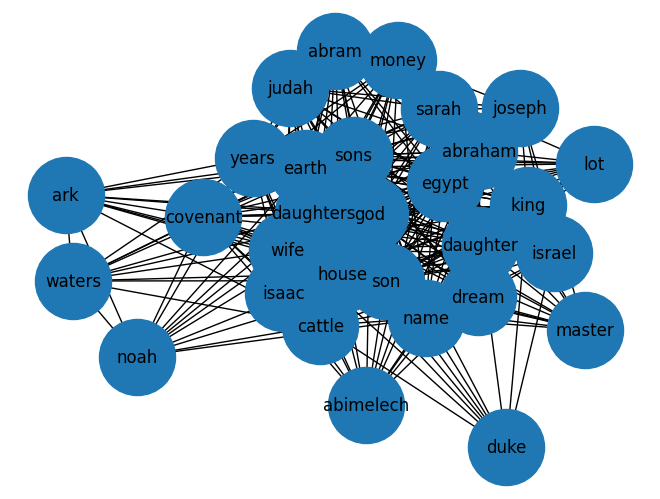

In [20]:
# Create a graph of connectedness between the top 30 words in Genesis based on the top_30_words_in_chapters_df dataframe.
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph.
G = nx.Graph()

# Add the top 30 words as nodes.
for word in top_30_words:
    G.add_node(word)

# Add edges between the top 30 words that are in the same chapter.
for chapter in top_30_words_in_chapters:
    for word1 in chapter:
        for word2 in chapter:
            if word1 != word2:
                G.add_edge(word1, word2)

# Draw the graph.
nx.draw(
    G,
    with_labels=True,
    node_size=3000,
    # node_color='lightblue',
    # font_size=10,
    # font_color='black',
    # font_weight='bold',
    # width=2,
    # edge_color='black',
    # alpha=0.5,
    # pos=nx.spring_layout(G, k=0.5, iterations=20)
)

# Show the graph.
plt.show()

In [21]:
# Let's see which words are used in the same verses as the top 30 words. Yeah I can look at that too...

Ok, so that's nice. Now it would be nice to add some depth to this, create a hierarchy somehow...
Hiearchical clusteing is something known, you have a distance matrix, and merge the ones that are closest at each step. So what would be a distance matrix in this case? 

Possibly a distance matrix can be given by: 
- inf if they don't appear together
- otherwise, it's 1/(n_times_together_in_verse) ? 

In [22]:
# Let's create a distance matrix of the top 30 words in Genesis
# depending on how many verses they are used in together.

top_30_words = genesis_tf_idf_word_type.head(30)["word"].values

# Create a list of verses.
verses = []
for chapter in range(1, 51):
    Chapter = Genesis[Genesis["chapter"] == chapter]
    chapter_verses = Chapter["text"].values
    verses.extend(chapter_verses)

# For each verse, create a list of words.
verses_words = []
verse_words_to_verse = {}
for verse in verses:
    verse_words = verse.split()
    verse_words = [word.strip(string.punctuation) for word in verse_words]
    verse_words = [word.lower() for word in verse_words]
    # Choose only verses that contain at least one of the top 30 words.
    if any(word in verse_words for word in top_30_words):
        verses_words.append(verse_words)
        verse_words_to_verse[" ".join(verse_words)] = verse


# Create the co-occurrence matrix.
co_occurrence_matrix = np.zeros((len(top_30_words), len(top_30_words)))

for verse in verses_words:
    for word1 in verse:
        for word2 in verse:
            if word1 == "father" and word2 == "son":
                print(verse_words_to_verse[" ".join(verse)])
            if word1 != word2:
                if word1 in top_30_words and word2 in top_30_words:
                    word1_index = top_30_words.tolist().index(word1)
                    word2_index = top_30_words.tolist().index(word2)
                    co_occurrence_matrix[word1_index, word2_index] += 1

co_occurrence_matrix_df = pd.DataFrame(
    co_occurrence_matrix, index=top_30_words, columns=top_30_words
)
# co_occurrence_matrix_df

And the first born bare a son, and called his name Moab: the same is the father of the Moabites unto this day.
And the younger, she also bare a son, and called his name Benammi: the same is the father of the children of Ammon unto this day.
And Isaac spake unto Abraham his father, and said, My father: and he said, Here am I, my son. And he said, Behold the fire and the wood: but where is the lamb for a burnt offering?
And Isaac spake unto Abraham his father, and said, My father: and he said, Here am I, my son. And he said, Behold the fire and the wood: but where is the lamb for a burnt offering?
And Rebekah spake unto Jacob her son, saying, Behold, I heard thy father speak unto Esau thy brother, saying,
And he came unto his father, and said, My father: and he said, Here am I; who art thou, my son?
And he came unto his father, and said, My father: and he said, Here am I; who art thou, my son?
And his father Isaac said unto him, Come near now, and kiss me, my son.
And Isaac his father sa

In [23]:
# Create a distance matrix from the co-occurrence matrix.
distance_matrix = np.zeros((len(top_30_words), len(top_30_words)))

for i in range(len(top_30_words)):
    for j in range(len(top_30_words)):
        if co_occurrence_matrix[i, j] == 0:
            distance_matrix[i, j] = 2
        else:
            distance_matrix[i, j] = 1 / co_occurrence_matrix[i, j]

distance_matrix_df = pd.DataFrame(
    distance_matrix, index=top_30_words, columns=top_30_words
)
distance_matrix_df

,joseph,abraham,duke,abram,master,isaac,sons,years,noah,earth,egypt,daughters,waters,son,lot,sarah,abimelech,dream,daughter,ark,god,king,money,name,cattle,israel,house,judah,covenant,wife
joseph,2.000000,0.500000,2.000000,2.000000,1.000000,0.500000,0.100000,0.111111,2.000000,0.250000,0.027778,2.000000,2.000000,0.142857,2.000000,2.000000,2.000000,0.111111,0.333333,2.000000,0.055556,0.500000,0.100000,0.333333,0.125000,0.083333,0.050000,1.000000,2.000000,0.333333
abraham,0.500000,2.000000,2.000000,1.000000,0.111111,0.032258,0.111111,0.200000,2.000000,0.333333,2.000000,2.000000,2.000000,0.038462,0.500000,0.050000,0.100000,2.000000,1.000000,2.000000,0.023810,0.500000,0.333333,0.100000,2.000000,2.000000,0.250000,2.000000,0.500000,0.100000
duke,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.045455,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.125000,2.000000,2.000000,2.000000,2.000000,0.333333,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.100000
abram,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.100000,2.000000,0.500000,0.250000,2.000000,2.000000,0.142857,0.100000,2.000000,2.000000,2.000000,0.500000,2.000000,0.166667,0.500000,2.000000,0.142857,1.000000,2.000000,0.250000,2.000000,1.000000,0.100000
master,1.000000,0.111111,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,0.333333,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.166667,2.000000,2.000000,2.000000,2.000000,2.000000,0.250000,2.000000,2.000000,0.250000
isaac,0.500000,0.032258,2.000000,2.000000,1.000000,2.000000,0.333333,0.250000,2.000000,0.500000,2.000000,0.166667,2.000000,0.032258,2.000000,0.200000,0.200000,2.000000,1.000000,2.000000,0.045455,0.500000,2.000000,0.200000,0.500000,1.000000,2.000000,2.000000,0.333333,0.062500
sons,0.100000,0.111111,0.045455,2.000000,2.000000,0.333333,2.000000,0.050000,0.058824,0.200000,0.090909,0.027778,0.500000,0.076923,0.333333,1.000000,2.000000,2.000000,0.100000,0.111111,0.125000,2.000000,1.000000,0.250000,0.500000,0.125000,0.500000,0.333333,0.500000,0.043478
years,0.111111,0.200000,2.000000,0.100000,2.000000,0.250000,0.050000,2.000000,0.166667,0.500000,0.076923,0.050000,1.000000,0.250000,1.000000,0.166667,2.000000,0.500000,0.200000,2.000000,0.333333,1.000000,2.000000,0.500000,0.333333,2.000000,0.250000,2.000000,2.000000,0.250000
noah,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.058824,0.166667,2.000000,0.090909,2.000000,1.000000,0.200000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.083333,0.076923,2.000000,2.000000,1.000000,0.500000,2.000000,1.000000,2.000000,1.000000,0.250000
earth,0.250000,0.333333,2.000000,0.500000,2.000000,0.500000,0.200000,0.500000,0.090909,2.000000,1.000000,0.333333,0.045455,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.090909,0.021277,1.000000,2.000000,0.142857,0.058824,2.000000,1.000000,2.000000,0.250000,1.000000


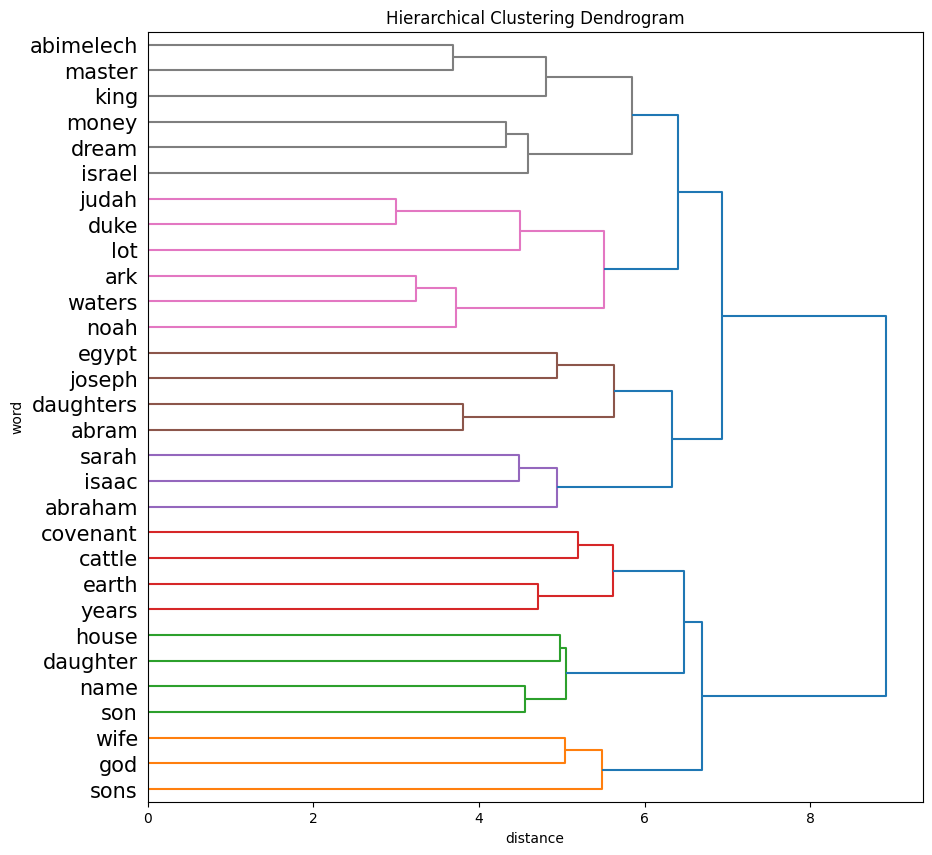

In [24]:
# Perform hierarchical clustering on the distance matrix.
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(distance_matrix, "complete")

plt.figure(figsize=(10, 10))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("word")
dendrogram(
    Z,
    leaf_font_size=15.0,  # font size for the x axis labels
    labels=top_30_words,
    orientation="right",
)
plt.show()

This is not too much info... But maybe we can make a "hierarchical game". Let's research this first. Distances are weird.

## Relation Extraction?

In [32]:
import os
import sys

module_path = os.path.abspath(os.path.join("."))
if module_path not in sys.path:
    sys.path.append(module_path)

In [35]:
from argparse import Namespace

args = Namespace(
    task="semeval",
    train_data="./data/SemEval2010_task8_all_data/SemEval2010_task8_training/TRAIN_FILE.TXT",
    test_data="./data/SemEval2010_task8_all_data/SemEval2010_task8_testing_keys/TEST_FILE_FULL.TXT",
    use_pretrained_blanks=0,
    num_classes=19,
    batch_size=32,
    gradient_acc_steps=2,
    max_norm=1.0,
    fp16=0,
    num_epochs=11,
    lr=7e-05,
    model_no=0,
    model_size="bert-base-uncased",
    train=1,
    infer=1,
)